<a href="https://colab.research.google.com/github/AyushiKashyapp/foodwise_knowledgeDB/blob/main/ExtractStakeholders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting major Food Wise and Food Vision Stakeholders

# Aim:

The aim is to extract major ***stakeholder organisations*** involved in the Food Wise 2025 and Food Vision 2030 projects.

The stakeholders are extracted from the official documentation files and implementation plans available at the Gov.ie website. The ***stakeholders*** are identified as the ***organisations*** mentioned in these documentations.

This code explains how to extract organization names from PDF documents using a RoBERTa-based Named Entity Recognition (NER) model and save them into an Excel file to support structured data storage and reusability.

1. **Installing required libraries:**

- pdfminer.six  : for extracting text from PDFs
- transformers  : for using the RoBERTa NER model
- pandas        : for creating the Excel file
- spacy         : for additional text processing

In [1]:
!pip install transformers pdfminer.six spacy pandas openpyxl
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 30.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
from transformers import pipeline
from pdfminer.high_level import extract_text
import pandas as pd
import re
import spacy

2. **Load the spacy model for addition text processing.**

`en_core_web_sm` is an English language multi-task Convolutional Neural Network(CNN) trained on OntoNotes. Assigns context-specific token vectors, POS tags, dependency parse, and named entities.

*Reference*: [Spacy en_core_web_sm](https://www.analyticsvidhya.com/blog/2022/06/custom-named-entity-recognition-using-spacy-v3/#:~:text=%60en_core_web_sm%60%20is%20an%20English%20language,dependency%20parse%2C%20and%20named%20entities.)

3. **Initialize the RoBERTa Model**

Define the model checkpoint for the RoBERTa-based NER and initialize the token classifier pipeline. RoBERTa is a reimplementation of BERT with some modifications to the key hyperparameters and tiny embedding tweaks, along with a setup for RoBERTa pre-trained models.

*Reference*: [Roberta Intialisation](https://stackoverflow.com/questions/72986264/company-name-extraction-with-bert-base-ner-easy-way-to-know-which-words-relate)



In [2]:
nlp = spacy.load('en_core_web_sm')

model_checkpoint = "xlm-roberta-large-finetuned-conll03-english"

# Initialize the token classifier pipeline
token_classifier = pipeline(
    "token-classification", model=model_checkpoint, aggregation_strategy="simple"
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/852 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-large-finetuned-conll03-english were not used when initializing XLMRobertaForTokenClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

4. **Extract Text from PDF**

Define a function to extract text from a given PDF file using `pdfminer.six`.

`extract_text` is a function provided by the pdfminer.six library, which is used to extract text from PDF files.

*Reference*: [extract_text](https://pdfminersix.readthedocs.io/en/latest/tutorial/highlevel.html)

In [3]:
def extract_text_from_pdf(pdf_path):
    return extract_text(pdf_path)

5. **Extract Organizations Using RoBERTa NER**

Define a function to extract organizations from text using the RoBERTa-based NER model.

*Reference*: [Roberta Intialisation](https://stackoverflow.com/questions/72986264/company-name-extraction-with-bert-base-ner-easy-way-to-know-which-words-relate)

In [4]:
def extract_organizations(text):
    classifier = token_classifier(text) #Using token_classifier pipeline (a pre-trained NER model) to process the input text.
    organizations = [item['word'] for item in classifier if item['entity_group'] == "ORG"]
    return organizations


Text Cleaning *Reference*: [Text Cleaning](https://medium.com/@priyankads/common-regular-expressions-for-text-cleaning-in-python-5a13b832d340#:~:text=For%20replacing%20the%20text%2C%20re,here%20is%20to%20remove%20characters.)

In [5]:
def clean_organization_name(name):
    name = re.sub(r'[\x00-\x1F\x7F-\x9F]', '', name) #Removing unwanted characters and trimming any leading or trailing whitespace.
    return name.strip()

6. **Process Multiple PDFs**

Define a function to process multiple PDF files, extract text, identify organizations, clean the names, and remove duplicates.

In [6]:
def extract_organizations_from_pdfs(pdf_paths):
    all_organizations = []
    for pdf_path in pdf_paths:
        text = extract_text_from_pdf(pdf_path)
        organizations = extract_organizations(text)
        cleaned_organizations = [clean_organization_name(org) for org in organizations]
        all_organizations.extend(cleaned_organizations)
    return list(set(all_organizations))  # Remove duplicates


7. **Specify PDF Files**

Listing the PDF files to be processed.

In [7]:
pdf_files = ["/content/FoodVision2030.pdf", "/content/FoodWise2025.pdf", "/content/FoodWiseImplementationPlan.pdf","/content/FoodVisionReport.pdf"]

8. **Extract and Save to Excel**

Extract organizations from the specified PDF files and save them into an Excel file using pandas.

In [8]:
organizations = extract_organizations_from_pdfs(pdf_files)

In [9]:
stakeholders = pd.DataFrame(organizations, columns=["Organization"])

In [10]:
stakeholders.to_excel("stakeholders.xlsx", index=False)

8. **Creating a WordCloud with the identified stakeholders'**.

*Reference*: [WordCloud](https://www.geeksforgeeks.org/generating-word-cloud-python/)

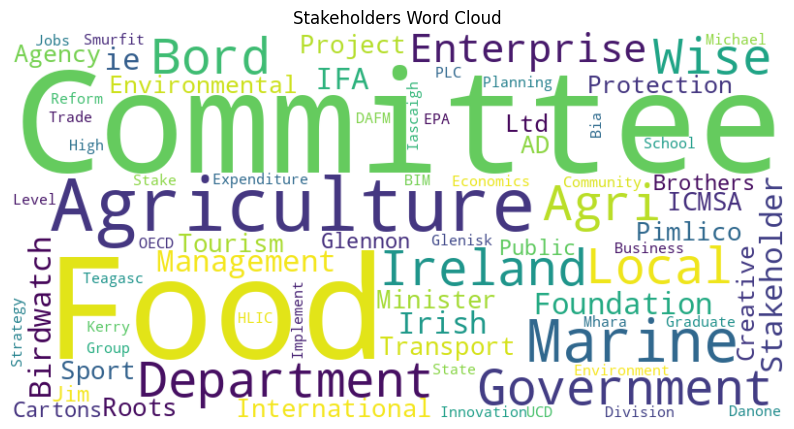

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

stakeholders_text = ' '.join(stakeholders['Organization'].tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(stakeholders_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Stakeholders Word Cloud")
plt.show()